<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/ALL_COMPUTATIONAL_SUBSTRATES_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap





## Substrates combined, xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>All features</a></li>
    <li><a href=#2>Feature subsets</a></li>
 </ol>


## All features<a name='1'>
<a href=#outline>Home</a>

In [4]:
## Read in the data 
import pandas as pd 

In [5]:
data_neil_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_neil_comp=data_neil_comp[~data_neil_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_neil_comp=format_for_xgboost(data_neil_comp)
random.seed(1234)
train_split2,eval_split2,test_split2=split_train_test_eval_by_mut_pos(data_neil_comp[~data_neil_comp['mut_pos'].isna()])
null_mut_pos=data_neil_comp[data_neil_comp['mut_pos'].isna()]
train_split2=pd.concat((train_split2,null_mut_pos),axis=0)

train_split2['dataset']="NEIL1_COMP"
eval_split2['dataset']="NEIL1_COMP"
test_split2['dataset']="NEIL1_COMP"

(434, 202)
{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 33}


In [6]:
data_ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_ttyh2_comp=data_ttyh2_comp[~data_ttyh2_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ttyh2_comp=format_for_xgboost(data_ttyh2_comp)
random.seed(1234)
train_split4,eval_split4,test_split4=split_train_test_eval_by_mut_pos(data_ttyh2_comp[~data_ttyh2_comp['mut_pos'].isna()])
null_mut_pos=data_ttyh2_comp[data_ttyh2_comp['mut_pos'].isna()]
train_split4=pd.concat((train_split4,null_mut_pos),axis=0)

train_split4['dataset']="TTYH2_COMP"
eval_split4['dataset']="TTYH2_COMP"
test_split4['dataset']="TTYH2_COMP"



(601, 205)
{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


In [7]:
data_ajuba=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)

#remove any null editing level values 
data_ajuba=data_ajuba[~data_ajuba["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ajuba=format_for_xgboost(data_ajuba)
random.seed(1234)
train_split5,eval_split5,test_split5=split_train_test_eval_by_mut_pos(data_ajuba[~data_ajuba['mut_pos'].isna()])
null_mut_pos=data_ajuba[data_ajuba['mut_pos'].isna()]
train_split5=pd.concat((train_split5,null_mut_pos),axis=0)

train_split5['dataset']="AJUBA"
eval_split5['dataset']="AJUBA"
test_split5['dataset']="AJUBA"


(482, 195)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 44}


In [8]:
train_split=pd.concat([train_split2,train_split4,train_split5])
eval_split=pd.concat([eval_split2,eval_split4,eval_split5])
test_split=pd.concat([test_split2,test_split4,test_split5])

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [9]:
train_dataset=train_split['dataset']
eval_dataset=eval_split['dataset']
test_dataset=test_split['dataset']

In [10]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [11]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [12]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append('dataset')
print("\n".join(to_drop))

u3_5prm_cp_internal
site_next_struct:I
u2_length_hairpin
d1_length_bulge
d2_length_stem
u2_3prm_cp_internal:U:G
u3_struct:B
u3_3prm_cp_internal
u1_3prm_cp_internal:U:A
u2_length_bulge
u3_3prm_cp_internal:G:U
u3_5prm_cp_internal:A:U
u2_5prm_cp_internal:G:U
u3_5prm_cp_bulge:C:G
site_struct:M
mut_prev_struct:M
u1_3prm_cp_internal:C:G
u2_5prm_cp_hairpin:A:U
d2_3prm_cp_bulge:U:G
mut_next_struct:E
site_5prm_cp_internal:A:U
d2_length_hairpin
d1_exist
u1_length_bulge
u3_5prm_cp_internal:U:A
d1_5prm_cp_internal
u1_5prm_cp_internal
site_prev_struct:B
d3_3prm_cp_bulge:G:C
u1_5prm_cp_bulge:C:G
d1_5prm_cp_internal:C:G
u2_5prm_cp_bulge:U:G
site_5prm_cp_bulge:U:G
u2_5prm_cp_hairpin:U:A
u3_3prm_cp_bulge:U:A
u3_length_internal_ecs
u2_length_stem
u2_5prm_cp_bulge:A:U
d3_5prm_cp_bulge
site_struct:H
d3_length_internal_es
d1_struct:I
d1_length_internal_ecs
mut_ref_nt:U
d2_5prm_cp_bulge:U:A
u1_3prm_cp_bulge
u3_length_internal_es
u2_5prm_cp_hairpin
d2_5prm_cp_hairpin
u1_3prm_cp_internal
u1_3prm_cp_bulge:A:U


In [13]:
#remove teh features that don't change across isoforms , or are null for all isoforms
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [14]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [15]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(1015, 137)
(1015,)
(201, 137)
(201,)
(244, 137)
(244,)


In [69]:
train_X

,minimum_free_energy,ensemble_free_energy,mfe_frequency,ensemble_diversity,sim_nor_score,probability_active_conf,num_mutations,mut_pos,mut_site_dist,mut_ref_nt:A,...,u1_struct:I,u1_5prm_cp_internal:U:A,u2_struct:S,u2_3prm_cp_bulge:U:A,u2_3prm_cp_internal:A:U,u2_3prm_cp_internal:C:G,u2_3prm_cp_internal:U:A,u3_struct:I,u3_5prm_cp_internal:G:C,d2_3prm_cp_bulge:G:C
0,-40.1,-41.29,0.143877,29.39,0.7426,0.137610,1,41.0,-6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-39.1,-40.32,0.138271,28.24,0.9301,0.065449,1,43.0,-4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-44.1,-44.78,0.331605,4.19,1.0000,0.321958,1,44.0,-3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-39.6,-40.44,0.256179,5.33,0.9853,0.123298,1,49.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-45.2,-45.96,0.293144,4.24,0.9879,0.281769,1,51.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,-70.2,-71.47,0.126827,2.89,0.9164,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1011,-65.9,-67.48,0.076642,6.67,0.9393,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1012,-65.6,-67.22,0.071944,5.66,0.9259,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1013,-65.6,-67.22,0.071774,5.83,0.9310,NaN,1,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [17]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['rmse']#['aucpr','auc','mae','map','rmse']

In [18]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [19]:
num_round = 1000
random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-rmse:0.27854	train-rmse:0.27936
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.20607	train-rmse:0.20227
[2]	eval-rmse:0.15736	train-rmse:0.14892
[3]	eval-rmse:0.12314	train-rmse:0.11100
[4]	eval-rmse:0.10192	train-rmse:0.08521
[5]	eval-rmse:0.09216	train-rmse:0.06810
[6]	eval-rmse:0.08431	train-rmse:0.05591
[7]	eval-rmse:0.07888	train-rmse:0.04746
[8]	eval-rmse:0.07691	train-rmse:0.04238
[9]	eval-rmse:0.07543	train-rmse:0.03756
[10]	eval-rmse:0.07350	train-rmse:0.03424
[11]	eval-rmse:0.07294	train-rmse:0.03210
[12]	eval-rmse:0.07247	train-rmse:0.02977
[13]	eval-rmse:0.07219	train-rmse:0.02845
[14]	eval-rmse:0.07165	train-rmse:0.02702
[15]	eval-rmse:0.07245	train-rmse:0.02637
[16]	eval-rmse:0.07267	train-rmse:0.02564
[17]	eval-rmse:0.07304	train-rmse:0.02536
[18]	eval-rmse:0.07309	train-rmse:0.02430
[19]	eval-rmse:0.07296	train-rmse:0.02345
[20]	eval-rmse:0.07307	tr

In [20]:
# save to binary file for faster loading
bst.save_model('ratio.combined.substrates.model')
# save model to text file 
bst.dump_model('ratio.combined.substrates.txt')


In [21]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [22]:
## get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred)

Train
	Spearman corr : SpearmanrResult(correlation=0.9995028052717276, pvalue=0.0)
	Pearson corr : (0.9999624664148032, 0.0)
	MAE : 0.0011100493827788654
	MAPE : 0.020865824944888024
	RMSE : 0.0015968848127957966
	auPRC : 1.0
	auROC : 0.9999999999999999
Eval
	Spearman corr : SpearmanrResult(correlation=0.8853600067725318, pvalue=4.0731767244205e-68)
	Pearson corr : (0.8963492823180511, 3.1716322886593493e-72)
	MAE : 0.040781025319716974
	MAPE : 0.4340605697817932
	RMSE : 0.07081477451227504
	auPRC : 0.7502878563532758
	auROC : 0.94688995215311
Test
	Spearman corr : SpearmanrResult(correlation=0.9187705750464285, pvalue=1.1672301083392987e-99)
	Pearson corr : (0.9219694583605624, 1.1012787565588366e-101)
	MAE : 0.039269301319708586
	MAPE : 0.47551700963862126
	RMSE : 0.07133161428257878
	auPRC : 0.9244563291188006
	auROC : 0.9861200085415331


In [23]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.1386059
8.270579524830179
1.2415206038626971
The R-square of the test data is  0.85 



In [24]:
## get performance on Neil1 subset 
from helpers import * 
cur_split="NEIL1_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.5)

Train
	Spearman corr : SpearmanrResult(correlation=0.9994055767759189, pvalue=0.0)
	Pearson corr : (0.9999721045820633, 0.0)
	MAE : 0.0012597688070243199
	MAPE : 0.01116042323660699
	RMSE : 0.0018338430085469662
	auPRC : 0.9999999999999997
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.8107481915404658, pvalue=4.714952662455673e-16)
	Pearson corr : (0.9069061463735003, 5.912048325076922e-25)
	MAE : 0.05208454855848686
	MAPE : 0.6568504543285538
	RMSE : 0.08496328667756001
	auPRC : 0.8794871794871797
	auROC : 0.9717171717171716
Test
	Spearman corr : SpearmanrResult(correlation=0.8992416050450296, pvalue=7.721440807465794e-27)
	Pearson corr : (0.9129743706626756, 5.803046499294934e-29)
	MAE : 0.059948266463147264
	MAPE : 0.31701714429748185
	RMSE : 0.09640753104948477
	auPRC : 0.9343048139672854
	auROC : 0.9635854341736695


In [25]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.27607584
3.9193443526908784
0.6691976671001305
The R-square of the test data is  0.829 



In [26]:
## get performance on TTYH2 subset 
from helpers import * 
cur_split="TTYH2_COMP"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9997436142025498, pvalue=0.0)
	Pearson corr : (0.9999335329999213, 0.0)
	MAE : 0.0010146865757025831
	MAPE : 0.014232811643575247
	RMSE : 0.001448293273172656
	auPRC : 0.9999999999999999
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.881525457139305, pvalue=9.363654589966191e-31)
	Pearson corr : (0.8413911119077864, 1.6317484059018083e-25)
	MAE : 0.044614461363078305
	MAPE : 0.26092423927067215
	RMSE : 0.07485407966752894
	auPRC : 0.928847881970673
	auROC : 0.9308510638297873
Test
	Spearman corr : SpearmanrResult(correlation=0.8838063698025992, pvalue=1.8940793802066525e-28)
	Pearson corr : (0.857400454256699, 4.403187223109945e-25)
	MAE : 0.039018368410776896
	MAPE : 0.6048290484330295
	RMSE : 0.06852999044004798
	auPRC : 0.8286688805697122
	auROC : 0.9442090395480226


In [27]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.123682916
1.4445850428885074
0.3897978459461847
The R-square of the test data is  0.73 



In [28]:
## get performance on AJUBA subset 
from helpers import * 
cur_split="AJUBA"
train_subset=train_dataset==cur_split
eval_subset=eval_dataset==cur_split
test_subset=test_dataset==cur_split
print_aggregate_peformance_metrics(train_y[train_subset],train_pred[train_subset],
                                   eval_y[eval_subset],eval_pred[eval_subset],
                                   test_y[test_subset],test_pred[test_subset],
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9960632723382372, pvalue=0.0)
	Pearson corr : (0.9996764746949813, 0.0)
	MAE : 0.0011006100901057166
	MAPE : 0.03760465669954616
	RMSE : 0.0015545416822934045
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.6320141175137763, pvalue=2.4660557773593465e-06)
	Pearson corr : (0.8401649337108138, 2.8652544421906653e-13)
	MAE : 0.017470847771300573
	MAPE : 0.4666008625104746
	RMSE : 0.02800443276917401
	auPRC : 0.7956043956043954
	auROC : 0.912087912087912
Test
	Spearman corr : SpearmanrResult(correlation=0.7085247421810099, pvalue=8.036386006261058e-15)
	Pearson corr : (0.7055664778590203, 1.16100248144825e-14)
	MAE : 0.02277426695020011
	MAPE : 0.48314724654453317
	RMSE : 0.045286242028214345
	auPRC : 0.9290262515262514
	auROC : 0.9883449883449884


In [29]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals= test_y[test_subset]-test_pred[test_subset]
y_test_mean = np.mean(test_pred[test_subset])
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y[test_subset]-y_test_mean)*(test_y[test_subset]-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.04131122
0.2532678491373185
0.1825250908163826
The R-square of the test data is  0.279 



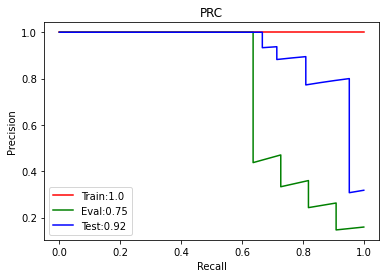

In [30]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

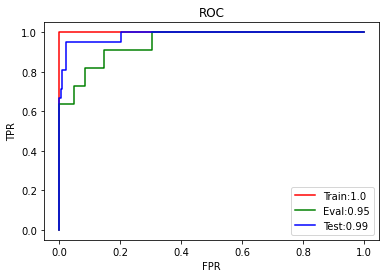

In [31]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

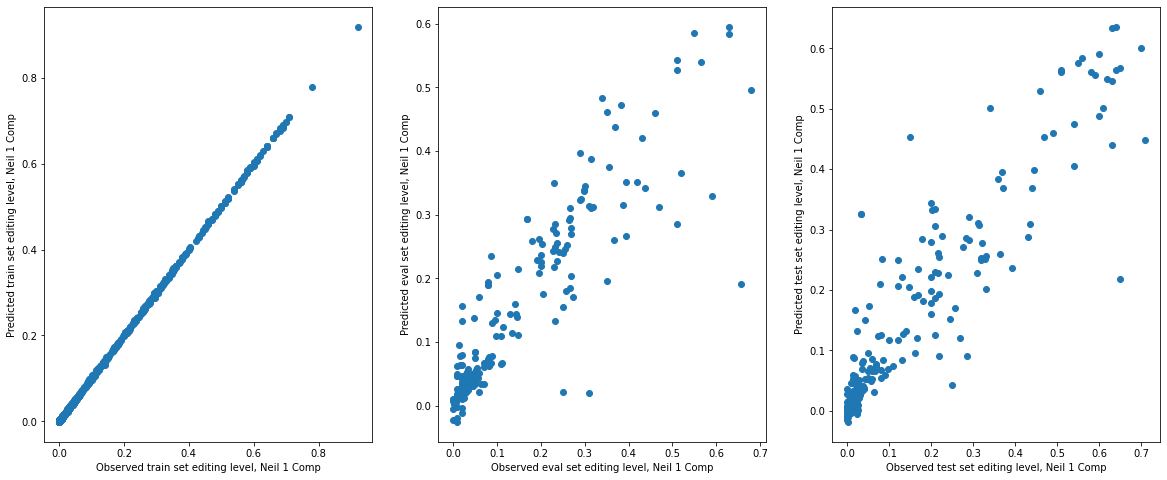

In [32]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Comp")
plt.ylabel("Predicted train set editing level, Neil 1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Comp")
plt.ylabel("Predicted eval set editing level, Neil 1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Comp")
plt.ylabel("Predicted test set editing level, Neil 1 Comp")

plt.show()

In [33]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':test_dataset})

In [34]:
test_df

,Observed,Predicted,Dataset
0,0.5400,0.404500,NEIL1_COMP
1,0.5500,0.575473,NEIL1_COMP
2,0.5900,0.556265,NEIL1_COMP
3,0.4700,0.452718,NEIL1_COMP
4,0.6300,0.633694,NEIL1_COMP
...,...,...,...
239,0.0365,0.037075,AJUBA
240,0.0240,-0.005096,AJUBA
241,0.0240,0.003551,AJUBA
242,0.0315,0.025794,AJUBA


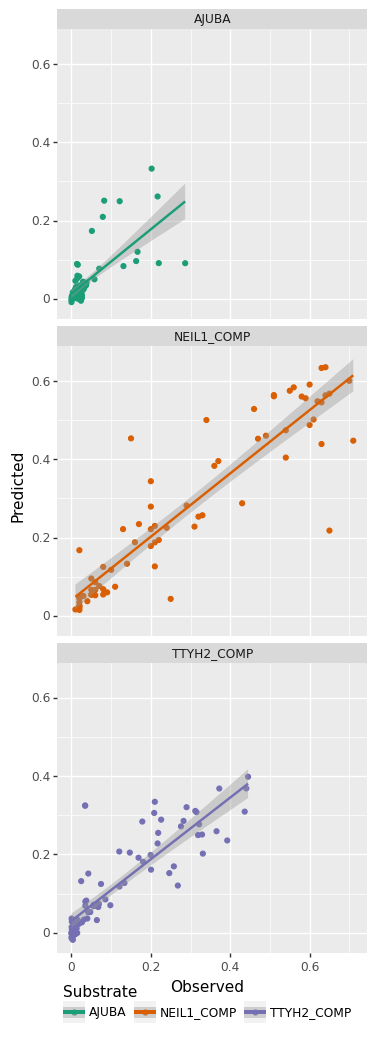

<ggplot: (8766870487785)>


In [35]:
plotnine.options.figure_size = (4, 12)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77','#d95f02','#7570b3'],name="Substrate")
 + facet_wrap('~Dataset',ncol=1,nrow=3)
 + theme(legend_position="bottom"))

print(p)
ggsave(plot=p, filename='all.comp.substrates.pdf',format='pdf',width=4,height=12,units='in')


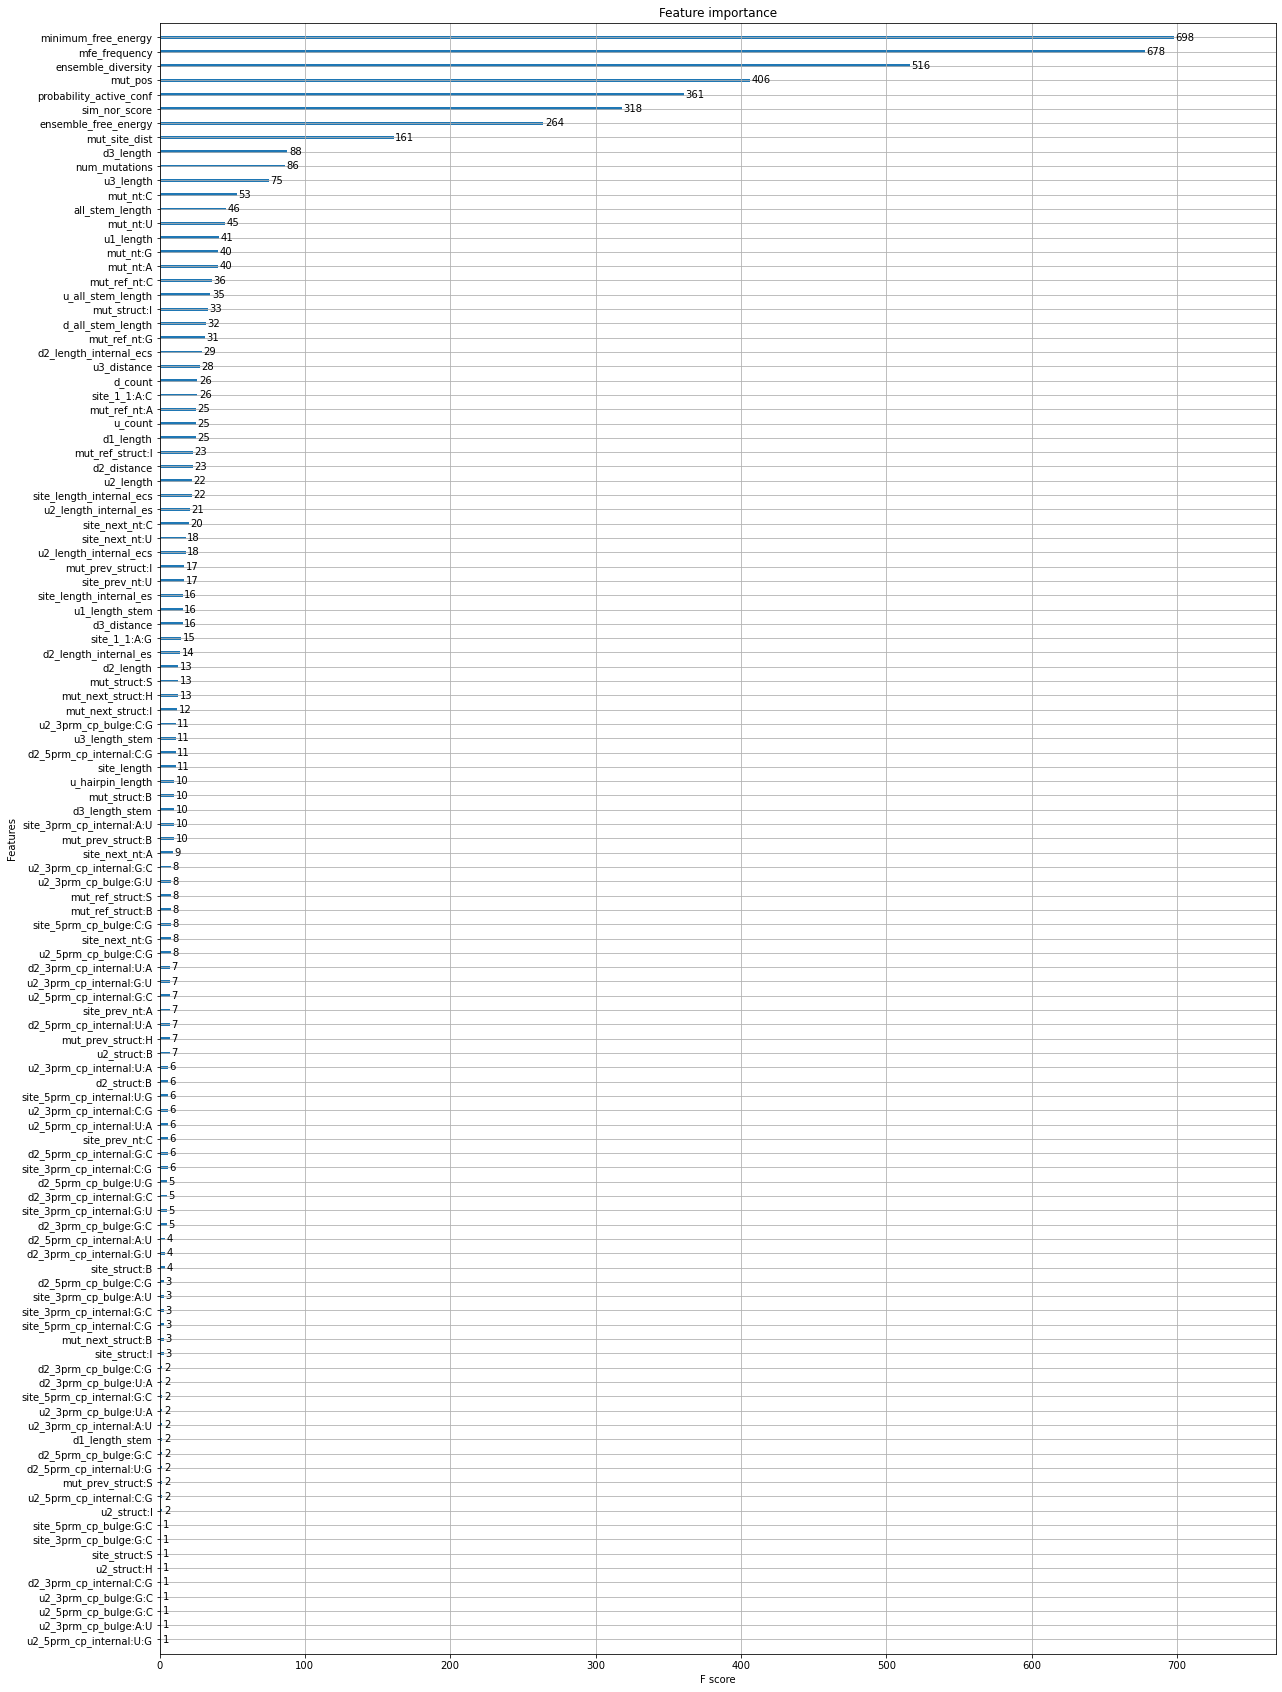

In [36]:
matplotlib.rcParams['figure.figsize'] = [20, 30]
xgboost.plot_importance(bst)

In [37]:
#xgboost.to_graphviz(bst, num_trees=2)


In [38]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)

#concatenate train, test, validate 
data_x=pd.concat([train_X,eval_X,test_X])
data_y=pd.concat([train_y,eval_y,test_y])
data_names=pd.concat([train_dataset,eval_dataset,test_dataset])
data_x.reset_index(inplace=True, drop=True) 
data_y.reset_index(inplace=True,drop=True)
data_names.reset_index(inplace=True,drop=True)



In [39]:
data_x_neil1=data_x[data_names=="NEIL1_COMP"]
data_y_neil1=data_y[data_names=="NEIL1_COMP"]
data_x_neil1.reset_index(inplace=True, drop=True) 
data_y_neil1.reset_index(inplace=True,drop=True)

data_x_ttyh2=data_x[data_names=="TTYH2_COMP"]
data_y_ttyh2=data_y[data_names=="TTYH2_COMP"]
data_x_ttyh2.reset_index(inplace=True, drop=True) 
data_y_ttyh2.reset_index(inplace=True,drop=True)

data_x_ajuba=data_x[data_names=="AJUBA"]
data_y_ajuba=data_y[data_names=="AJUBA"]
data_x_ajuba.reset_index(inplace=True, drop=True) 
data_y_ajuba.reset_index(inplace=True,drop=True)


In [40]:
shap_values_neil1 = explainer.shap_values(data_x_neil1)
shap_values_ttyh2 = explainer.shap_values(data_x_ttyh2)
shap_values_ajuba = explainer.shap_values(data_x_ajuba)
shap_values = explainer.shap_values(test_X)


In [41]:
max(data_y_neil1)

0.92

In [42]:
min(data_y_neil1)


0.0

In [43]:
max(data_y_ttyh2)

0.6559999999999999

In [44]:
min(data_y_ttyh2)

0.0

In [45]:
max(data_y_ajuba)

0.4235

In [46]:
min(data_y_ajuba)

0.0

0.92
0.0


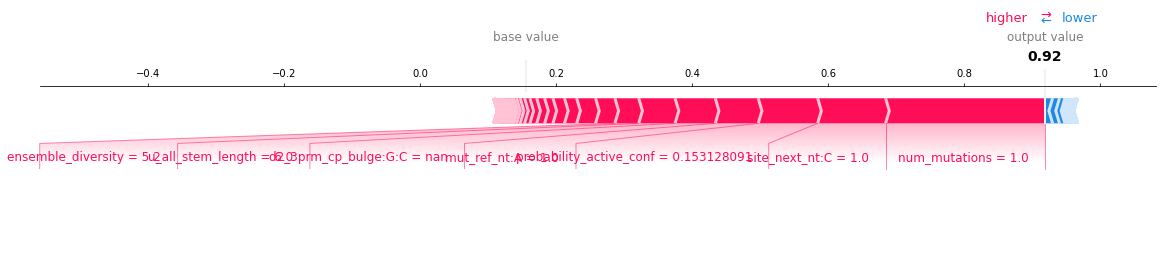

In [47]:
###### Max and min editing level Neil 1
max_index=data_y_neil1.index[data_y_neil1 == max(data_y_neil1)]
min_index=data_y_neil1.index[data_y_neil1 == min(data_y_neil1)]
print(max(data_y_neil1))
print(min(data_y_neil1))
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_neil1[max_index,:], data_x_neil1.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("neil1.max.joint.forceplot.pdf",format='pdf',height=1,width=7,bbox_inches="tight",dpi=300)


In [48]:
min_index[0]

225

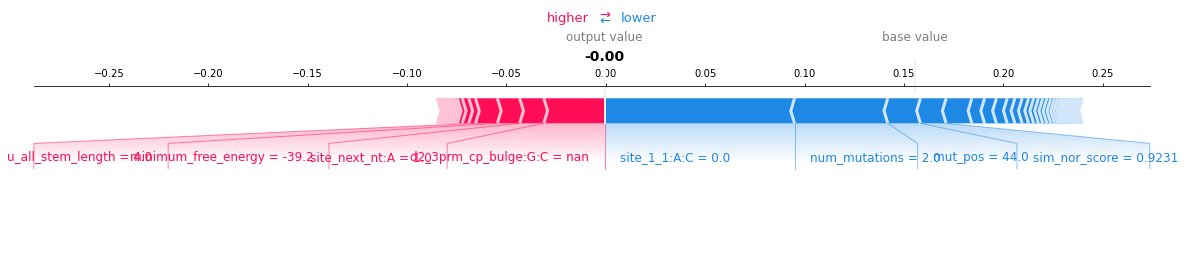

In [49]:
shap.force_plot(explainer.expected_value, shap_values_neil1[min_index[0],:], data_x_neil1.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("neil1.min.joint.forceplot.pdf",format='pdf',height=1,width=7,bbox_inches="tight",dpi=300)

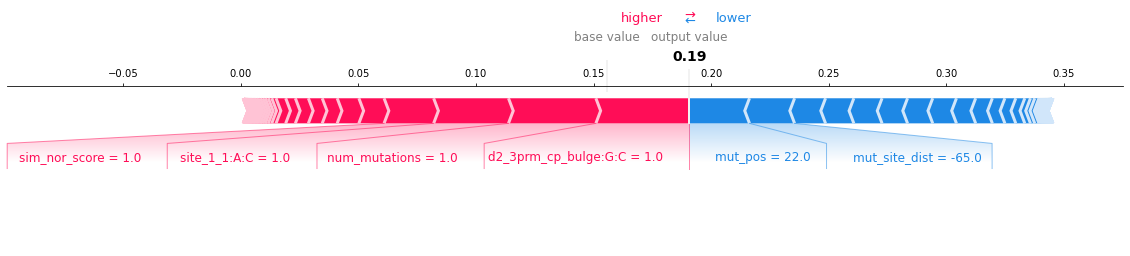

In [50]:
## Max and min editing level TTYH2
max_index=data_y_ttyh2.index[data_y_ttyh2 == max(data_y_ttyh2)]
min_index=data_y_ttyh2.index[data_y_ttyh2 == min(data_y_ttyh2)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ttyh2[max_index,:], data_x_ttyh2.iloc[max_index,:],matplotlib=True,show=False)
plt.savefig("ttyh2.max.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

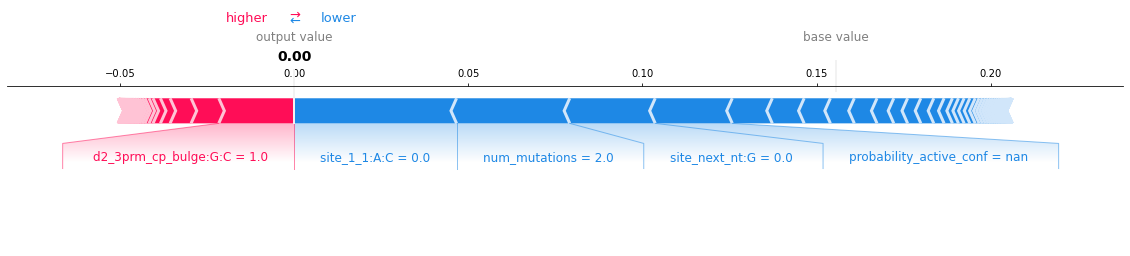

In [51]:
shap.force_plot(explainer.expected_value, shap_values_ttyh2[min_index[0],:], data_x_ttyh2.iloc[min_index[0],:],matplotlib=True,show=False)
plt.savefig("ttyh2.min.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

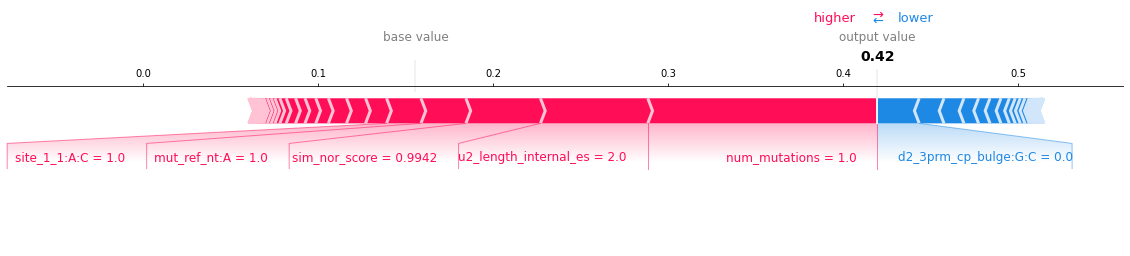

In [52]:
## Max and min editing level AJUBA
max_index=data_y_ajuba.index[data_y_ajuba == max(data_y_ajuba)]
min_index=data_y_ajuba.index[data_y_ajuba == min(data_y_ajuba)]

# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_ajuba[max_index,:], data_x_ajuba.iloc[max_index,:],matplotlib=True, show=False)
plt.savefig("ajuba.max.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

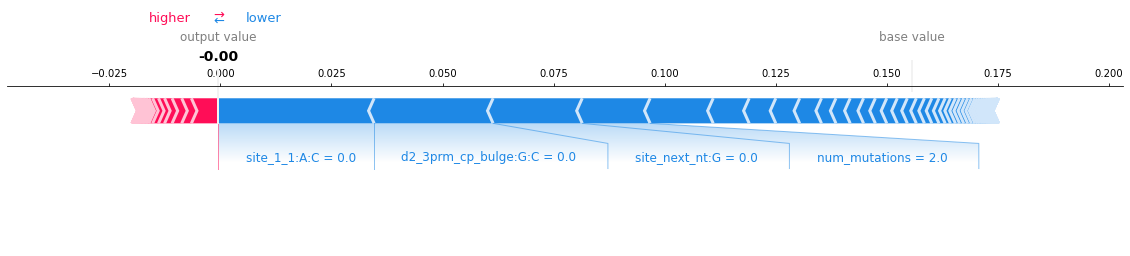

In [53]:
shap.force_plot(explainer.expected_value, shap_values_ajuba[min_index[0],:], data_x_ajuba.iloc[min_index[0],:],matplotlib=True, show=False)
plt.savefig("ajuba.min.joint.forceplot.pdf",format='pdf',height=2,width=10,bbox_inches="tight",dpi=300)

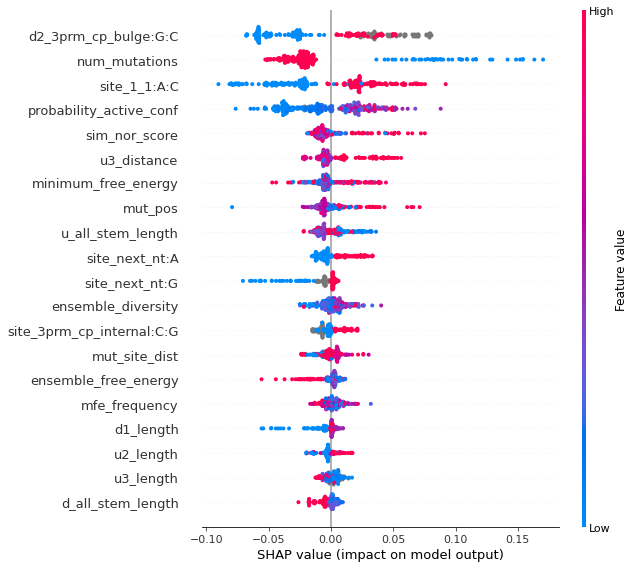

In [54]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X,show=False)
plt.savefig("all.comp.shap.pdf", format='pdf',width=8,height=10,dpi=300,bbox_inches="tight")

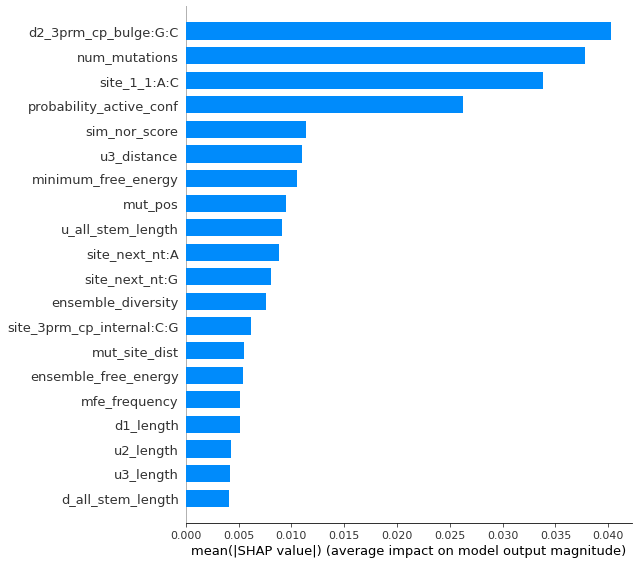

In [55]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, data_x, plot_type="bar")

In [56]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(data_x)
shap_interaction_values.shape

(1460, 137, 137)

In [57]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [58]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [59]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Feature subset<a name='2'>
<a href=#outline>Home</a>

In [60]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


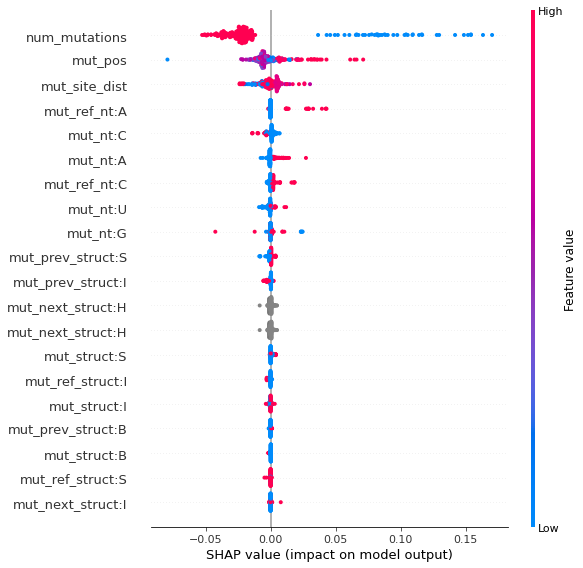

Contribution/Total:0.22318156
['site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


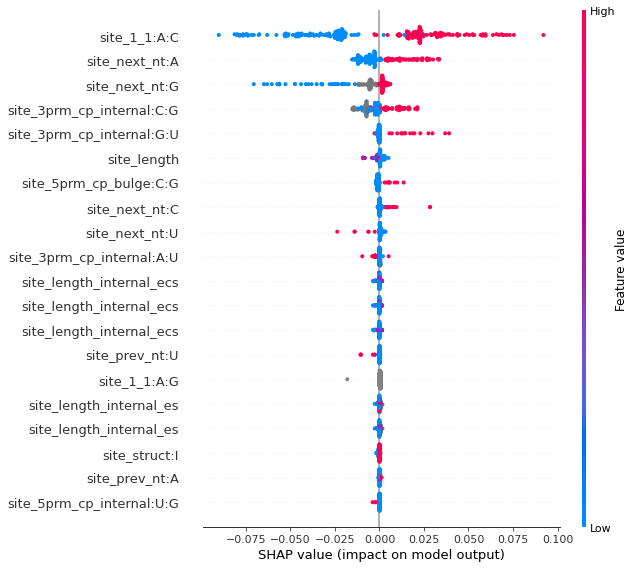

Contribution/Total:0.21500233
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


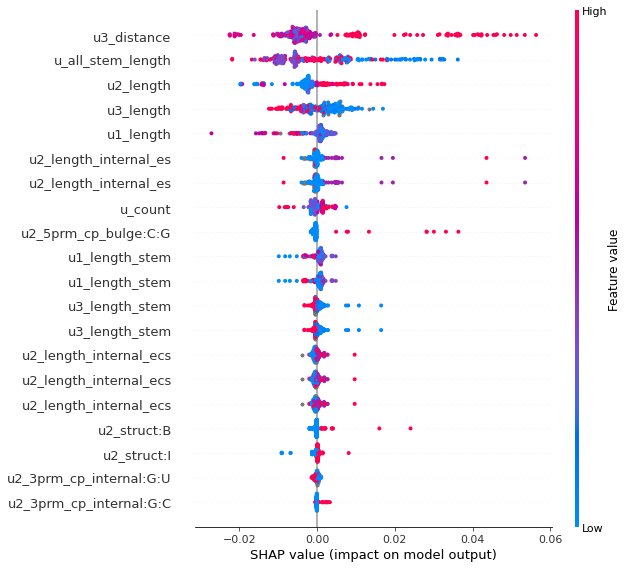

Contribution/Total:0.14736593
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length*', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length*', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


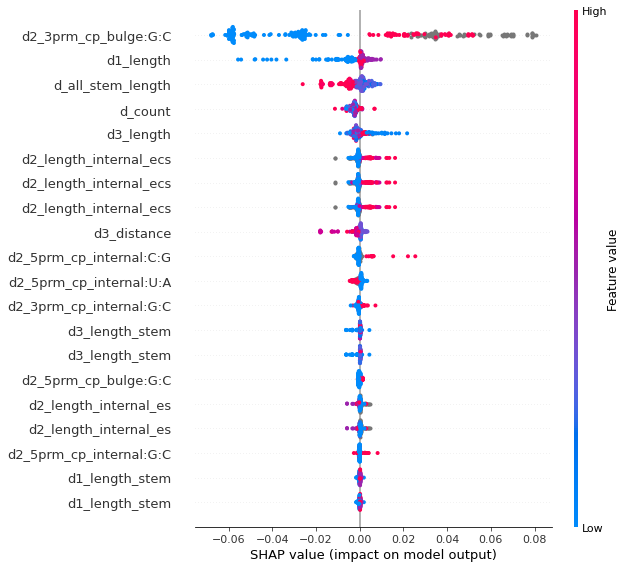

Contribution/Total:0.22600783
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*',

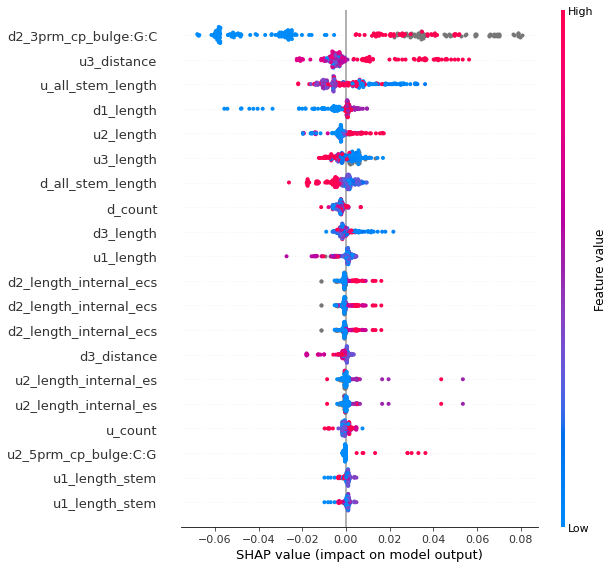

Contribution/Total:0.37337375
['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


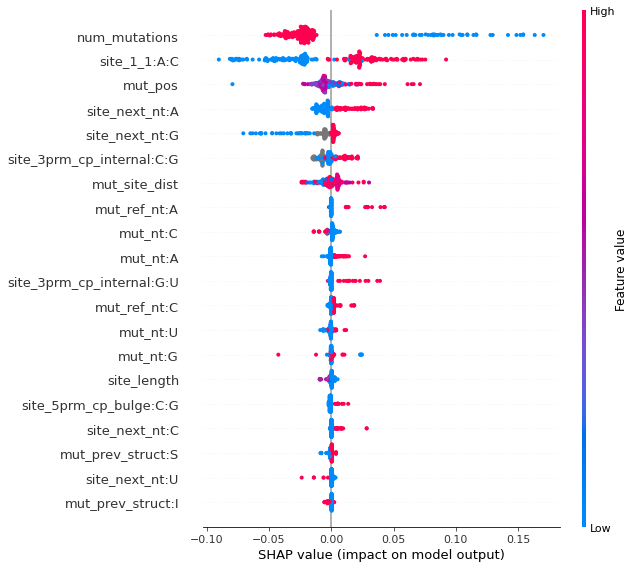

Contribution/Total:0.4381838
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_s

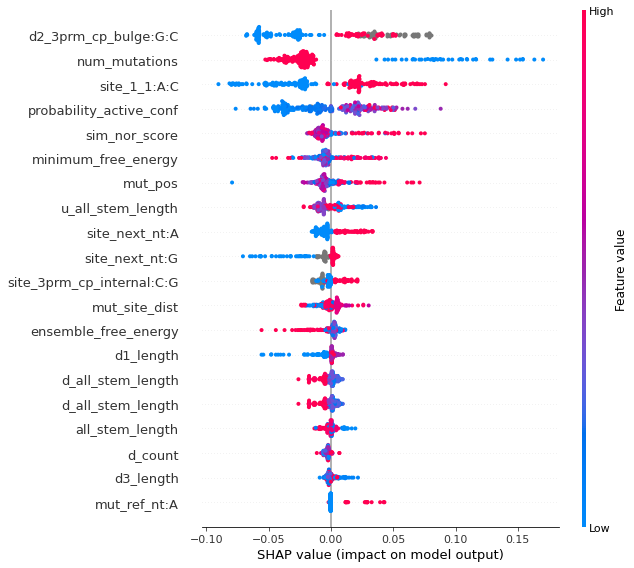

Contribution/Total:0.892302
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', '

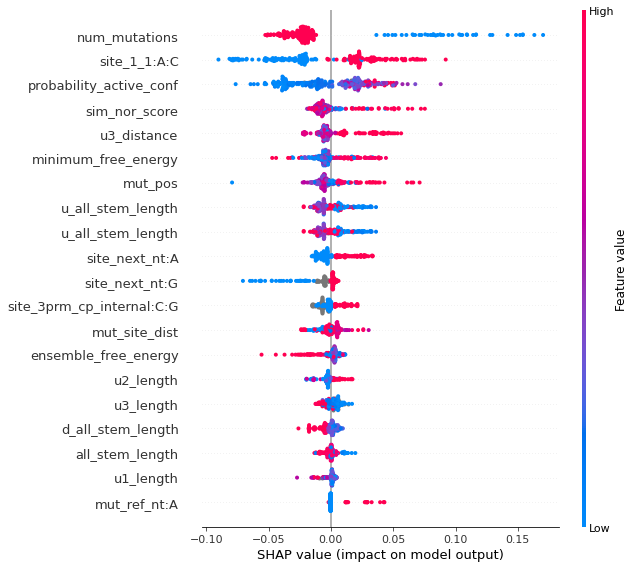

Contribution/Total:0.81366
['site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


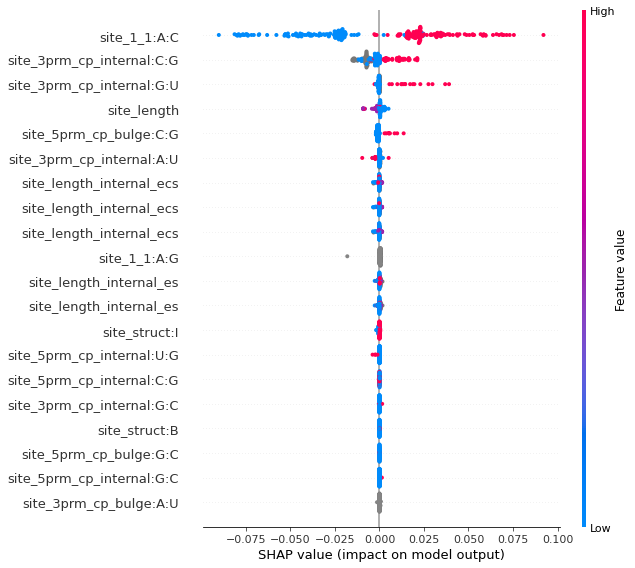

Contribution/Total:0.1525999
['site_prev_nt*', 'site_next_nt*']


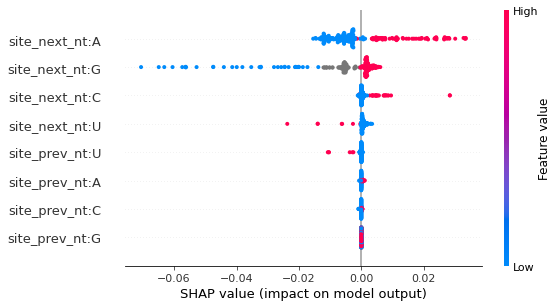

Contribution/Total:0.062402416
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*']


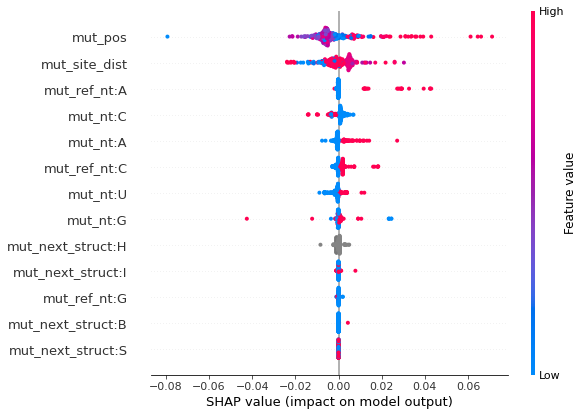

Contribution/Total:0.085417055
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'site_prev_nt*', 'site_next_nt*']


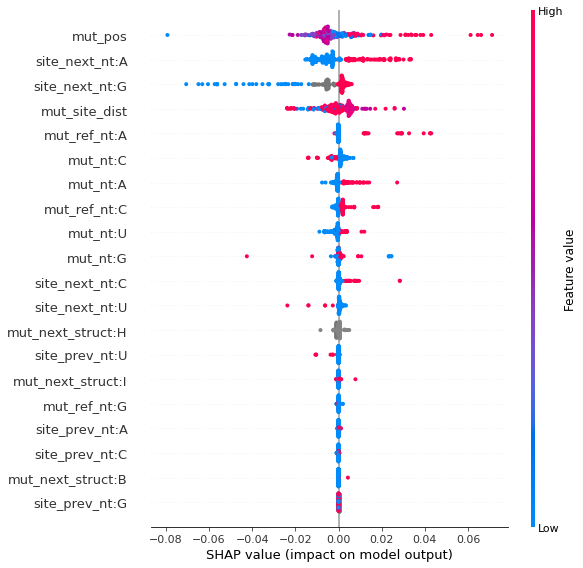

Contribution/Total:0.14781947
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_c

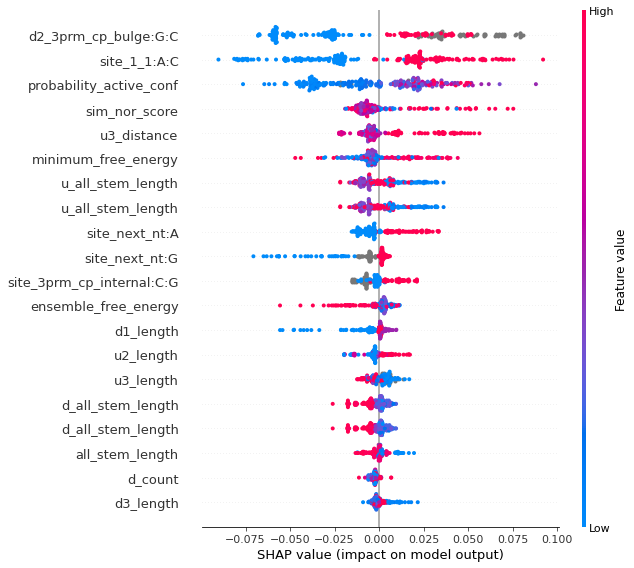

Contribution/Total:0.8164864
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*']


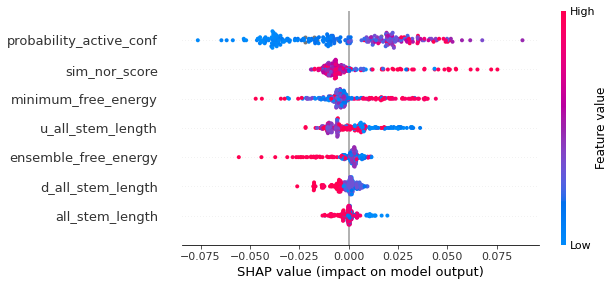

Contribution/Total:0.22811025


In [61]:
from feature_subsets import * 
subset_names=["mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=test_X[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [62]:
subset_names
subset_contribs

[0.22318156,
 0.21500233,
 0.14736593,
 0.22600783,
 0.37337375,
 0.4381838,
 0.892302,
 0.81366,
 0.1525999,
 0.062402416,
 0.085417055,
 0.14781947,
 0.8164864,
 0.22811025]

In [63]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [64]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 


In [65]:
subset_contrib_df

,Subset,Contribution
0,no_up,89.230198
1,no_mut,81.648642
2,no_down,81.366003
3,mut_site,43.818381
4,u_d,37.337375
5,overall_structure,22.811025
6,d,22.600783
7,mut,22.318156
8,site,21.500233
9,site_struct,15.259990


In [66]:
from pandas.api.types import CategoricalDtype
from plotnine.data import mpg

In [67]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)


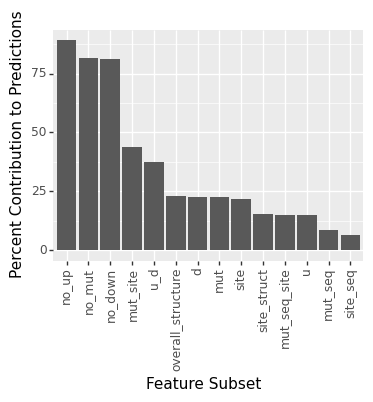

<ggplot: (8766853645017)>

In [68]:
plotnine.options.figure_size = (4, 3)
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + theme(axis_text_x=element_text(angle=90))
 + ylab("Percent Contribution to Predictions"))
ggsave(plot=p, filename='all.comp.subset.importance.pdf',device='pdf',width=5,height=4,units='in')
p